In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image


read image file


In [2]:
data = os.listdir(r"D:\work\y2-1\linearProject\dts\Digits")
data_X = []
data_y = []
data_classes = len(data)
for i in range(0, data_classes):
    data_list = os.listdir(
        r"D:\work\y2-1\linearProject\dts\Digits" + "/"+str(i))
    for j in data_list:
        pic = cv2.imread(
            r"D:\work\y2-1\linearProject\dts\Digits" + "/"+str(i)+"/"+j)
        pic = cv2.resize(pic, (32, 32))
        data_X.append(pic)  # img 0-9
        data_y.append(i)  # number 0-9

if len(data_X) == len(data_y):
    print("Total Dataponits = ", len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

print(data_y)


Total Dataponits =  10160
[0 0 0 ... 9 9 9]


split x -> trainX ,testX & split y -> trainY ,testY


In [3]:
train_X, test_X, train_y, test_y = train_test_split(
    data_X, data_y, test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(
    train_X, train_y, test_size=0.2)
print("Training Set Shape = ", train_X.shape)
print("Validation Set Shape = ", valid_X.shape)
print("Test Set Shape = ", test_X.shape)


Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


In [4]:
# Preprocessing the images for neuralnet
def Prep(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # making image grayscale
    img = cv2.equalizeHist(img)  # Histogram equalization to enhance contrast
    img = img/255  # normalizing
    return img


train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X = np.array(list(map(Prep, valid_X)))


# Reshaping the images
train_X = train_X.reshape(
    train_X.shape[0], train_X.shape[1], train_X.shape[2], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2], 1)
valid_X = valid_X.reshape(
    valid_X.shape[0], valid_X.shape[1], valid_X.shape[2], 1)

# Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                             zoom_range=0.2, shear_range=0.1, rotation_range=10)  # random generate img data
datagen.fit(train_X)  # trian datagen with train_X


In [5]:
# to_categorical is function for Converts a class vector (integers) to binary class matrix.
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)


Model Building (Nueral Net)


In [6]:
# Creating a Neural Network
model = Sequential()

model.add((Conv2D(60, (5, 5), input_shape=(32, 32, 1),
          padding='Same', activation='relu')))
model.add((Conv2D(60, (5, 5), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add((Conv2D(30, (3, 3), padding="same", activation='relu')))
model.add((Conv2D(30, (3, 3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                    

In [9]:
# Compiling the model

optimizer = tf.keras.optimizers.legacy.RMSprop(
    learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model

history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                    epochs=100, validation_data=(valid_X, valid_y),
                    verbose=2, steps_per_epoch=200)

# Testing the model on the test set

score = model.evaluate(test_X, test_y, verbose=0)
model.save(r"D:\work\y2-1\linearProject\model2")
print(score)
print('Test Score = ', score[0])
print('Test Accuracy =', score[1])


Epoch 1/100
200/200 - 43s - loss: 0.6898 - accuracy: 0.7706 - val_loss: 0.0687 - val_accuracy: 0.9762 - 43s/epoch - 217ms/step
Epoch 2/100
200/200 - 42s - loss: 0.2410 - accuracy: 0.9233 - val_loss: 0.0593 - val_accuracy: 0.9819 - 42s/epoch - 209ms/step
Epoch 3/100
200/200 - 44s - loss: 0.1756 - accuracy: 0.9457 - val_loss: 0.0406 - val_accuracy: 0.9850 - 44s/epoch - 218ms/step
Epoch 4/100
200/200 - 44s - loss: 0.1356 - accuracy: 0.9600 - val_loss: 0.0308 - val_accuracy: 0.9907 - 44s/epoch - 221ms/step
Epoch 5/100
200/200 - 43s - loss: 0.1233 - accuracy: 0.9628 - val_loss: 0.0281 - val_accuracy: 0.9922 - 43s/epoch - 215ms/step
Epoch 6/100
200/200 - 41s - loss: 0.1069 - accuracy: 0.9674 - val_loss: 0.0313 - val_accuracy: 0.9896 - 41s/epoch - 207ms/step
Epoch 7/100
200/200 - 42s - loss: 0.1028 - accuracy: 0.9680 - val_loss: 0.0292 - val_accuracy: 0.9891 - 42s/epoch - 208ms/step
Epoch 8/100
200/200 - 41s - loss: 0.0997 - accuracy: 0.9716 - val_loss: 0.0207 - val_accuracy: 0.9922 - 41s/epo

INFO:tensorflow:Assets written to: D:\work\y2-1\linearProject\model2\assets


INFO:tensorflow:Assets written to: D:\work\y2-1\linearProject\model2\assets


[0.008776502683758736, 0.9960629940032959]
Test Score =  0.008776502683758736
Test Accuracy = 0.9960629940032959


Randomly select an image from the dataset


In [10]:

def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 6)
    #blur = cv2.bilateralFilter(gray,9,75,75)
    threshold_img = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
    return threshold_img


In [11]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area > 50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest, max_area


def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4, 1, 2), dtype=np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis=1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new


def splitcells(img):
    rows = np.vsplit(img, 9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r, 9)
        for box in cols:
            boxes.append(box)
    return boxes


INPUT


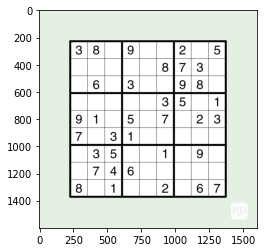

In [12]:
# Importing puzzle to be solved
try:
    puzzle = cv2.imread(r"D:\work\y2-1\linearProject\dts\test\su.jpg")
    plt.figure()
    plt.imshow(puzzle)
    plt.show()
except:
    print('Not found image')
    # let's see what we got


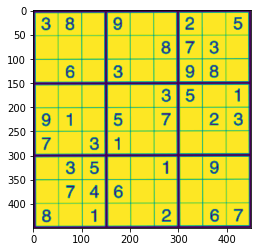

In [13]:
# Resizing puzzle to be solved
puzzle = cv2.resize(puzzle, (450, 450))
# Preprocessing Puzzle
su_puzzle = preprocess(puzzle)

# Finding the outline of the sudoku puzzle in the image
su_contour_1 = su_puzzle.copy()
su_contour_2 = su_puzzle.copy()
su_contour, hierarchy = cv2.findContours(
    su_puzzle, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour, -1, (0, 255, 0), 3)

black_img = np.zeros((450, 450, 3), np.uint8)
su_biggest, su_maxArea = main_outline(su_contour)
if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    cv2.drawContours(su_contour_2, su_biggest, -1, (0, 255, 0), 10)
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1, su_pts2)
    su_imagewrap = cv2.warpPerspective(puzzle, su_matrix, (450, 450))
    su_imagewrap = cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(su_imagewrap)
plt.show()


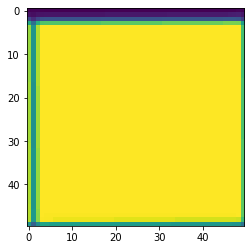

In [14]:
sudoku_cell = splitcells(su_imagewrap)
# Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell[58])
plt.show()


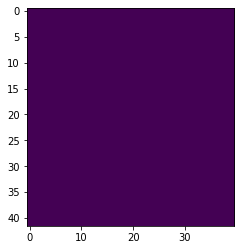

In [15]:
# The sudoku_cell's output includes the boundaries this could lead to misclassifications by the model
# I am cropping the cells to avoid that
# sneeking in a bit of PIL lib as cv2 was giving some weird error that i couldn't ward off

def CropCell(cells):
    Cells_croped = []
    for image in cells:

        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)

    return Cells_croped


sudoku_cell_croped = CropCell(sudoku_cell)
# Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[58])
plt.show()


In [54]:
def read_cells(cell, model):

    result = []
    for image in cell:
        # preprocess the image as it was in the model
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] - 4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)
        # getting predictions and setting the values if probabilities are above 65%

        predictions = model.predict(img)
        # classIndex = model.predict_classes(img)
        predict_x = model.predict(img)
        classIndex = np.argmax(predict_x, axis=-1)
        probabilityValue = np.amax(predictions)

        if probabilityValue > 0.65:
            result.append(classIndex[0])
        else:
            result.append(0)
    return result


grid = read_cells(sudoku_cell_croped, model)
print(grid)
grid = np.asarray(grid)
print(grid)


1/1 [==============================] - 0s 25ms/step
[3, 8, 0, 9, 0, 0, 2, 0, 5, 0, 0, 0, 0, 0, 8, 7, 3, 0, 0, 6, 0, 3, 0, 0, 9, 8, 0, 0, 0, 0, 0, 0, 3, 5, 0, 1, 9, 1, 0, 5, 0, 7, 0, 2, 3, 7, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 1, 0, 9, 0, 0, 7, 4, 6, 0, 0, 0, 0, 0, 8, 0, 1, 0, 0, 2, 0, 6, 7]
[3 8 0 9 0 0 2 0 5 0 0 0 0 0 8 7 3 0 0 6 0 3 0 0 9 8 0 0 0 0 0 0 3 5 0 1 9
 1 0 5 0 7 0 2 3 7 0 3 1 0 0 0 0 0 0 3 5 0 0 1 0 9 0 0 7 4 6 0 0 0 0 0 8 0
 1 0 0 2 0 6 7]


In [55]:
grid = np.reshape(grid, (9, 9))
grid


array([[3, 8, 0, 9, 0, 0, 2, 0, 5],
       [0, 0, 0, 0, 0, 8, 7, 3, 0],
       [0, 6, 0, 3, 0, 0, 9, 8, 0],
       [0, 0, 0, 0, 0, 3, 5, 0, 1],
       [9, 1, 0, 5, 0, 7, 0, 2, 3],
       [7, 0, 3, 1, 0, 0, 0, 0, 0],
       [0, 3, 5, 0, 0, 1, 0, 9, 0],
       [0, 7, 4, 6, 0, 0, 0, 0, 0],
       [8, 0, 1, 0, 0, 2, 0, 6, 7]], dtype=int64)

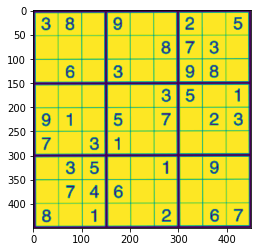

In [56]:
plt.figure()
plt.imshow(su_imagewrap)
plt.show()


In [57]:


def Solved(quiz):
    for row in range(9):
        if row % 3 == 0 and row != 0:
            print("---------------------")

        for col in range(9):
            if col % 3 == 0 and col != 0:
                print("|", end=" ")

            if col == 8:
                print(quiz[row][col])
            else:
                print(str(quiz[row][col]) + " ", end="")


def solve(grid, row, col, num):
    for x in range(9):
        if grid[row][x] == num:
            return False

    for x in range(9):
        if grid[x][col] == num:
            return False

    startRow = row - row % 3
    startCol = col - col % 3
    for i in range(3):
        for j in range(3):
            if grid[i + startRow][j + startCol] == num:
                return False
    return True


def Suduko(grid, row, col):

    M = 9
    if (row == M - 1 and col == M):
        return True
    if col == M:
        row += 1
        col = 0
    if grid[row][col] > 0:
        return Suduko(grid, row, col + 1)
    for num in range(1, M + 1, 1):

        if solve(grid, row, col, num):

            grid[row][col] = num
            if Suduko(grid, row, col + 1):
                return True
        grid[row][col] = 0
    return False


In [58]:


if (Suduko(grid, 0, 0)):
    Solved(grid)
else:
    print("Solution does not exist:(")


3 8 7 | 9 6 4 | 2 1 5
5 4 9 | 2 1 8 | 7 3 6
1 6 2 | 3 7 5 | 9 8 4
---------------------
4 2 6 | 8 9 3 | 5 7 1
9 1 8 | 5 4 7 | 6 2 3
7 5 3 | 1 2 6 | 8 4 9
---------------------
6 3 5 | 7 8 1 | 4 9 2
2 7 4 | 6 3 9 | 1 5 8
8 9 1 | 4 5 2 | 3 6 7
